In [6]:
import numpy as np
import skimage.io
import skimage.viewer
import matplotlib.pyplot as plt
import ipympl
from PIL import Image
from scipy import ndimage as ndi

In [7]:
%matplotlib widget
img = skimage.io.imread(fname="photo.jpg")

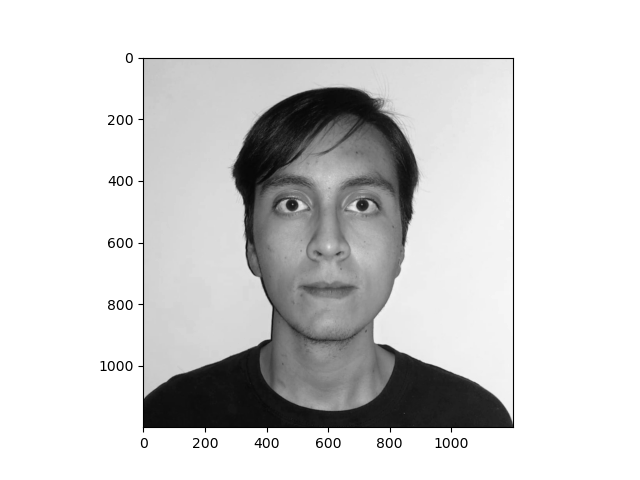

In [9]:
image = img[:,:,1]
w, h = image.shape
plt.figure()
plt.imshow(image, cmap="gray")

In [6]:
image

array([[182, 182, 182, ..., 213, 213, 213],
       [182, 182, 182, ..., 213, 213, 213],
       [182, 182, 182, ..., 213, 213, 213],
       ...,
       [ 20,  21,  22, ...,  58,  59,  61],
       [ 21,  22,  22, ...,  55,  58,  60],
       [ 22,  22,  22, ...,  53,  57,  60]], dtype=uint8)

In [5]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
image1 = ndi.affine_transform(image, mat_identity)

In [6]:
%matplotlib widget
plt.imshow(image1, cmap="gray")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
s_x, s_y = 1.5, .5
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
image2 = ndi.affine_transform(image, mat_scale)

In [8]:
%matplotlib widget
plt.imshow(image2, cmap="gray")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,w/2],[0,1,-h],[0,0,1]])
image3 = ndi.affine_transform(image, mat_reflect) # offset=(0,h)

In [10]:
%matplotlib widget
plt.imshow(image3, cmap="gray")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
image4 = ndi.affine_transform(image, mat_rotate)

In [12]:
%matplotlib widget
plt.imshow(image4, cmap="gray")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
image5 = ndi.affine_transform(image, mat_shear)

In [14]:
%matplotlib widget
plt.imshow(image5, cmap="gray")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
from skimage import transform

points_of_interest = np.array([[360, 110], 
                               [420, 270], 
                               [130, 400], 
                               [100, 280]])

projection = np.array([[500, 200],
                       [500, 390],
                       [100, 390],
                       [100, 200]])

tform = transform.estimate_transform('projective', points_of_interest, projection)
image6 = transform.warp(image, tform.inverse, mode = 'symmetric')

%matplotlib widget
plt.imshow(image6, cmap="gray")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …